<a href="https://colab.research.google.com/github/justeaguey/CE888/blob/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df.isnull().values.any()


False

In [25]:
df['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

In [100]:
df = df.drop(columns = ['duration'])

df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

df = pd.get_dummies(df)

df.head()


,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


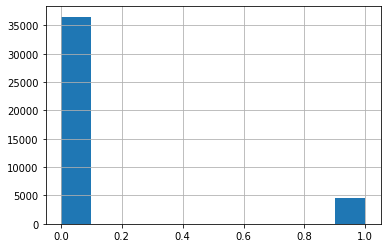

In [101]:
df['y'].hist()

In [102]:
attribute = df.drop('y', axis=1)
label = df['y']
attribute_train, attribute_test, label_train, label_test = train_test_split(attribute, label, test_size=0.2, random_state=50, stratify = label) #splits the data into a test and train set

In [119]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=3)
RFC.fit(attribute_train, label_train)
label_predict = cross_val_predict(RFC, attribute_test, label_test, cv=10)  # cross-validation
print("ACC = %.2f" % acc(label_test, label_predict))
print("F1 Score = %.2f" % f1_score(label_test, label_predict))

ACC = 0.90
F1 Score = 0.28


In [73]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(attribute_train, label_train)
print("Dummy ACC: %.2f" % acc(label_test, dummy_clf.predict(attribute_test)))

Dummy ACC: 0.80


In [75]:
parameters = {'n_estimators': (50, 100, 200, 300), 'max_depth': [3, 6, 9, 12]}

GSCV = GridSearchCV(RandomForestClassifier(), parameters, verbose = 1, cv = 3, n_jobs = -1) #our grid search to determine the best parameters, with a 3 fold cross validation
GSCV.fit(attribute_train, label_train)
print('Best parameters: ' + str(GSCV.best_params_))
print("ACC: %.2f" % acc(label_test, GSCV.predict(attribute_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.5min finished


Best parameters: {'max_depth': 12, 'n_estimators': 100}
ACC: 0.91


In [107]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=12)
RFC.fit(attribute_train, label_train)
print("ACC = %.2f" % acc(label_test, RFC.predict(attribute_test)))


ACC = 0.90


In [96]:
print(df. columns)

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_

In [108]:
features = ['age', 'contact', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

[ 8  9  3  0 60  5  7  6  2  4  1 58 59 48 51 54 49 37 32 39 56 55 23 24
 53 29 10 57 40 15 11 19 42 43 31 52 35 28 34 18 22 26 33 47 17 14 16 27
 20 44 46 50 13 41 38 21 12 45 25 30 36]
Feature ranking:
1. euribor3m (0.153456)
2. nr.employed (0.123589)
3. pdays (0.081227)
4. age (0.060241)
5. poutcome_success (0.058848)
6. emp.var.rate (0.055811)
7. cons.conf.idx (0.054412)
8. cons.price.idx (0.043131)
9. campaign (0.026675)
10. previous (0.026459)
11. contact (0.017036)
12. poutcome_failure (0.015549)
13. poutcome_nonexistent (0.014959)
14. month_mar (0.014018)
15. month_oct (0.013935)
16. day_of_week_mon (0.010351)
17. month_may (0.010112)
18. housing_no (0.009056)
19. education_university.degree (0.008801)
20. housing_yes (0.008418)
21. day_of_week_tue (0.008002)
22. day_of_week_thu (0.007979)
23. marital_married (0.007807)
24. marital_single (0.007765)
25. day_of_week_fri (0.007694)
26. education_high.school (0.007350)
27. job_admin. (0.007218)
28. day_of_week_wed (0.007142)
29. l

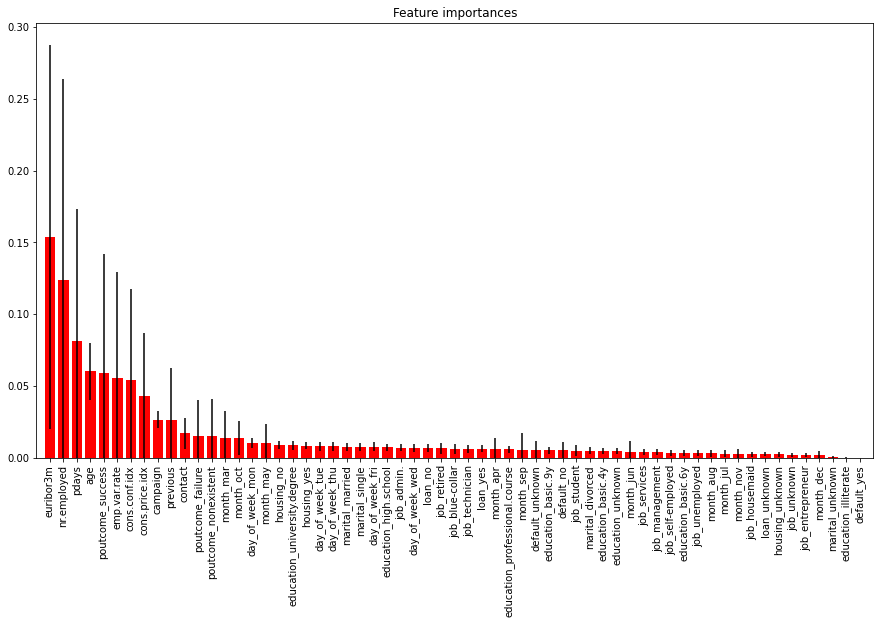

In [124]:
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(attribute.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(attribute.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(attribute.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, attribute.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [123]:
RFC = RandomForestClassifier(n_estimators=300, max_depth=12, random_state = 60)
RFC.fit(attribute_train, label_train)
label_predict = cross_val_predict(RFC, attribute_test, label_test, cv=10)  # cross-validation
print("ACC = %.2f" % acc(label_test, label_predict))
print("F1 Score = %.2f" % f1_score(label_test, label_predict))

ACC = 0.90
F1 Score = 0.37
